# Multi word phrases #

Hypothese:
Wenn Wörter mit einem Bindestrich verbunden werden kann es dazu führen, dass die Bedeutung falsch interpretiert wird.

Grund: Challenges for Toxic Comment Classification:
An In-Depth Error Analysis

# Schimpfwörter #

Hypothese:
Schimpfwörter werden fehlinterpretiert wenn sie durch Sonderzeichen verschleiert werden.

Grund: Statische Analyse

In [1]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagramm_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')
import csv
import re

In [2]:
#Swear_Word_Deutsch.csv
ger_swear_words = []
with open('../data/Swear_Word_Deutsch.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        ger_swear_words.append(row['Swear Word'])
# als Teilwort
def all(c):
    return True
def containsSwearWord(element):
    for ger_swear_word in ger_swear_words:
        if element['text'].find(ger_swear_word) > 0:
            return False
    return True
def findReFilter(regexp):
    def f(element):
        return regexp.search(element['text'])
    return f


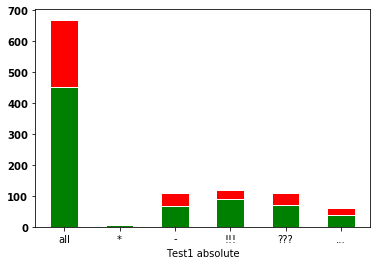

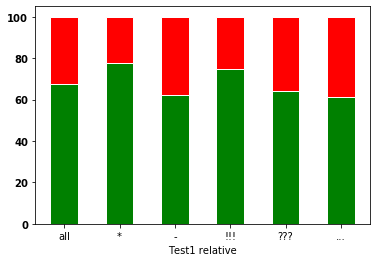

all


positiv labels (287),negative labels (383)


,true (452),false (218)
positiv (245),157,88
negativ (425),295,130


accuracy,precision,recall,f1Score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


nicht Schimpfwort Deutsch


positiv labels (3),negative labels (6)


,true (7),false (2)
positiv (5),3,2
negativ (4),4,0


accuracy,precision,recall,f1Score
0.7777777777777778,0.6,1.0,0.7499999999999999


positiv labels (289),negative labels (381)


,true (454),false (216)
positiv (245),159,86
negativ (425),295,130


accuracy,precision,recall,f1Score
0.6776119402985075,0.6489795918367347,0.5501730103806228,0.5955056179775281


-


positiv labels (43),negative labels (66)


,true (68),false (41)
positiv (38),20,18
negativ (71),48,23


accuracy,precision,recall,f1Score
0.6238532110091743,0.5263157894736842,0.46511627906976744,0.49382716049382713


positiv labels (282),negative labels (388)


,true (493),false (177)
positiv (245),175,70
negativ (425),318,107


accuracy,precision,recall,f1Score
0.735820895522388,0.7142857142857143,0.6205673758865248,0.6641366223908918


..


positiv labels (48),negative labels (61)


,true (70),false (39)
positiv (31),20,11
negativ (78),50,28


accuracy,precision,recall,f1Score
0.6422018348623854,0.6451612903225806,0.4166666666666667,0.5063291139240507


positiv labels (270),negative labels (400)


,true (491),false (179)
positiv (245),168,77
negativ (425),323,102


accuracy,precision,recall,f1Score
0.7328358208955223,0.6857142857142857,0.6222222222222222,0.6524271844660194


In [3]:
uppercaseFilters = []
# uppercaseFilters.append(('all',generate_filter(0, 2000, uppercaseWords)))
# addFilterInterval(uppercaseFilters, 0, 10, 1, uppercaseWords)
uppercaseFilters.append(('all', all))
# uppercaseFilters.append(('nicht Schimpfwort Deutsch',containsSwearWord))
uppercaseFilters.append(('*',findReFilter(re.compile('.[\*]'))))
uppercaseFilters.append(('-',findReFilter(re.compile('\w\-\w'))))
uppercaseFilters.append(('!!!',findReFilter(re.compile(r'.[\!]'))))
uppercaseFilters.append(('???',findReFilter(re.compile(r'.[\?]'))))
uppercaseFilters.append(('...',findReFilter(re.compile(r'.[\.][\.]'))))

#name, filters, relative
createPlt(name = "Test1 absolute", filters = uppercaseFilters, relative = False)
createPlt(name = "Test1 relative", filters = uppercaseFilters, relative = True)
print('all')
showMetrics(calcMetrics())
print('nicht Schimpfwort Deutsch')
showMetrics(calcMetrics(uppercaseFilters[1][1]))
showMetrics(calcMetricDifference(calcMetrics(uppercaseFilters[1][1])))
print('-')
showMetrics(calcMetrics(uppercaseFilters[2][1]))
showMetrics(calcMetricDifference(calcMetrics(uppercaseFilters[2][1])))
print('..')
showMetrics(calcMetrics(uppercaseFilters[4][1]))
showMetrics(calcMetricDifference(calcMetrics(uppercaseFilters[4][1])))